### 투빅스15기 강지우 
### KNN assignment 1

In [54]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv('./data1.csv')
df.head(3)

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696


In [56]:
list(df.columns)

['Unnamed: 0',
 'User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [57]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


In [58]:
df.columns = ['uid','pid','gender','age', 'occup', 'city', 'city_years','martial', 'pc1', 'pc2', 'pc3','purchase']
df.columns

Index(['uid', 'pid', 'gender', 'age', 'occup', 'city', 'city_years', 'martial',
       'pc1', 'pc2', 'pc3', 'purchase'],
      dtype='object')

In [59]:
df_origin = df.copy()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         4998 non-null   int64  
 1   pid         4998 non-null   object 
 2   gender      4998 non-null   object 
 3   age         4998 non-null   object 
 4   occup       4998 non-null   int64  
 5   city        4998 non-null   object 
 6   city_years  4998 non-null   object 
 7   martial     4998 non-null   int64  
 8   pc1         4998 non-null   int64  
 9   pc2         3465 non-null   float64
 10  pc3         1544 non-null   float64
 11  purchase    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 468.7+ KB


In [61]:
df.describe()

,uid,occup,martial,pc1,pc2,pc3,purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [62]:
len(df.columns)

12

### 1) preprocessing

In [90]:
df = df_origin.copy()

In [91]:
# id 삭제
df.drop(['pid'], axis=1, inplace=True)
df.drop(['uid'], axis=1, inplace=True)

# y = purchase
#순서형 변수  -> 정규화
order_col = ['city_years', 'age']
#범주형 변수
cat_col = ['gender', 'martial','city', 'occup','pc1','pc2','pc3']

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      4998 non-null   object 
 1   age         4998 non-null   object 
 2   occup       4998 non-null   int64  
 3   city        4998 non-null   object 
 4   city_years  4998 non-null   object 
 5   martial     4998 non-null   int64  
 6   pc1         4998 non-null   int64  
 7   pc2         3465 non-null   float64
 8   pc3         1544 non-null   float64
 9   purchase    4998 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 390.6+ KB


### 결측치 처리

In [93]:
#결측이 있는 pc2,3 최빈값으로 대체
most_freq2 = df['pc2'].value_counts().index[0]
df['pc2'] = df['pc2'].fillna(most_freq2)

most_freq3 = df['pc3'].value_counts().index[0]
df['pc3'] = df['pc3'].fillna(most_freq2)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      4998 non-null   object 
 1   age         4998 non-null   object 
 2   occup       4998 non-null   int64  
 3   city        4998 non-null   object 
 4   city_years  4998 non-null   object 
 5   martial     4998 non-null   int64  
 6   pc1         4998 non-null   int64  
 7   pc2         4998 non-null   float64
 8   pc3         4998 non-null   float64
 9   purchase    4998 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 390.6+ KB


In [95]:
df_imp = df.copy()

In [109]:
df = df_imp.copy()
order_col = ['city_years', 'age']

df['city_years'] = df['city_years'].str.replace('+', '')
df['city_years'] = pd.to_numeric(df['city_years'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['age'])
df['age'] = le.transform(df['age'])

In [110]:
cat_col = ['gender', 'martial','city', 'occup','pc1','pc2','pc3']

df = pd.get_dummies(df, columns=cat_col)

In [107]:
df

,age,city_years,purchase,gender_F,gender_M,martial_0,martial_1,city_A,city_B,city_C,...,pc3_9.0,pc3_10.0,pc3_11.0,pc3_12.0,pc3_13.0,pc3_14.0,pc3_15.0,pc3_16.0,pc3_17.0,pc3_18.0
0,0,3,2010,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4483,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,7696,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,16429,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,5780,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,6,1,11701,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4994,6,1,2045,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4995,6,3,4505,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4996,6,2,1413,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [114]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
fitted = std_scaler.fit(df)
df_scaled = std_scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=list(df.index.values))

In [116]:
df_scaled['purchase'] = df['purchase']

In [117]:
df_scaled

,age,city_years,purchase,gender_F,gender_M,martial_0,martial_1,city_A,city_B,city_C,...,pc3_9.0,pc3_10.0,pc3_11.0,pc3_12.0,pc3_13.0,pc3_14.0,pc3_15.0,pc3_16.0,pc3_17.0,pc3_18.0
0,0.0,0.75,2010,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.25,4483,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.25,7696,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.75,16429,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.75,5780,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1.0,0.25,11701,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4994,1.0,0.25,2045,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,1.0,0.75,4505,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4996,1.0,0.50,1413,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
df_scale_comp = df_scaled.copy()
df_before_scale_comp = df.copy()

### y 를 purchase로 하여 knn regreesion 실시

In [135]:
df = df_scaled.copy()

In [136]:
X = df.drop('purchase', axis=1)
y = df['purchase']

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=12212)
knn = KNeighborsRegressor(5) # n_neighbors = 5 # metric ='euclidean'
knn.fit(x_train, y_train)
print('test score : {:.3f}'.format(knn.score(x_test, y_test)))

test score : 0.383


### GridSearchCV

In [140]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors' : [3,5,7,9,11, 13, 15, 17, 19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params,
    verbose = 1,
    cv=3,
    n_jobs = -1)
gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   35.7s finished


In [141]:
print(gs_results.best_score_)

0.3912037376180466


In [142]:
print(gs_results.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')


In [143]:
print(gs_results.best_params_)

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


### Evaluation

In [147]:
model=gs.best_estimator_  # 최적의 파라미터로 모델 생성
pred = model.predict(x_test)

In [149]:
from sklearn.metrics import mean_squared_error 
import math
error = math.sqrt(mean_squared_error(y_test,pred))

In [151]:
error

3869.2267556257

In [156]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K, weights ='uniform' )

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4908.124536724797
RMSE value for k=  2 is: 4251.998715380803
RMSE value for k=  3 is: 4122.889616050051
RMSE value for k=  4 is: 4021.446495105959
RMSE value for k=  5 is: 3943.3730512686725
RMSE value for k=  6 is: 3900.218177649382
RMSE value for k=  7 is: 3874.1510416500755
RMSE value for k=  8 is: 3858.2648605396444
RMSE value for k=  9 is: 3848.3109835451282
RMSE value for k=  10 is: 3858.8054244597515
RMSE value for k=  11 is: 3859.118908991901
RMSE value for k=  12 is: 3866.912310475317
RMSE value for k=  13 is: 3868.7504911898436
RMSE value for k=  14 is: 3873.5068124975987
RMSE value for k=  15 is: 3869.2267556257
RMSE value for k=  16 is: 3890.2688208440363
RMSE value for k=  17 is: 3888.8350269672633
RMSE value for k=  18 is: 3893.9096189898564
RMSE value for k=  19 is: 3908.3291527597007
RMSE value for k=  20 is: 3895.3497558221907


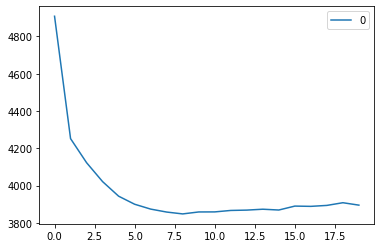

In [157]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}에서 가장 좋은 성능을 보이며, 'n_neighbors'가 대략 7정도 지나면서 급격하게 성능이 좋아짐을 볼 수 있다.